Using TensorFlow backend.


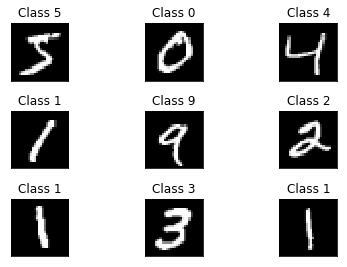

In [1]:
# reference https://nextjournal.com/a/17592186058848

# imports for array-handling and plotting
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig



In [2]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

print(np.unique(y_train, return_counts=True))

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)



X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [3]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=8,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "./"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

mnist_model = load_model(model_name)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/8
 - 18s - loss: 0.2472 - acc: 0.9258 - val_loss: 0.1165 - val_acc: 0.9617
Epoch 2/8
 - 17s - loss: 0.0988 - acc: 0.9700 - val_loss: 0.0779 - val_acc: 0.9755
Epoch 3/8
 - 22s - loss: 0.0716 - acc: 0.9774 - val_loss: 0.0671 - val_acc: 0.9781
Epoch 4/8
 - 44s - loss: 0.0544 - acc: 0.9824 - val_loss: 0.0615 - val_acc: 0.9811
Epoch 5/8
 - 43s - loss: 0.0473 - acc: 0.9847 - val_loss: 0.0636 - val_acc: 0.9807
Epoch 6/8
 - 46s - loss: 0.0372 - acc: 0.9877 - val_loss: 0.0606 - val_acc: 0.9827
Epoch 7/8
 - 46s - loss: 0.0369 - acc: 0.9878 - val_loss: 0.0659 - val_acc: 0.9814
Epoch 8/8
 - 37s - loss: 0.0288 - acc: 0.9901 - val_loss: 0.0704 - val_acc: 0.9803
Saved trained model at ./keras_mnist.h5 
Test Loss 0.070394783303
Test Accuracy 0.9803


10000/10000 [==============================] - 2s 218us/step

9803  classified correctly
197  classified incorrectly


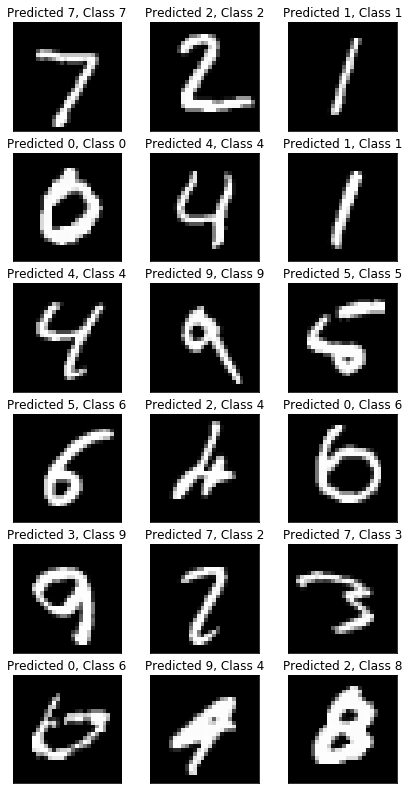

In [4]:
# load the model and create predictions on the test set
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation